\begin{center}

\noindent{\Large \bf Appendix Programming \\ A general comparative phylogenetic framework for coevolving traits and coevolving lineages}
\bigskip

\noindent {\normalsize \sc Marc Manceau$^1$, Amaury Lambert$^{2,3}$, Hélène Morlon$^4$}\\
\noindent {\small \it 
$^1$Muséum National d'Histoire Naturelle, 75005 Paris, France;\\
$^2$Laboratoire Probabilités et Modèles Aléatoires, UPMC Univ Paris 06, 75005 Paris, France;\\
$^3$Center for Interdisciplinary Research in Biology, Collège de France, CNRS UMR 7241, 75005 Paris, France;\\
$^4$Institut de Biologie, \'Ecole Normale Supérieure, CNRS UMR 8197, 75005 Paris, France}\\
\end{center}

The aim of this document is to describe the R codes associated to our framework. We describe the class \texttt{PhenotypicModel}, show how to manipulate the different methods included in the class, and illustrate their use around a simple (non-ultrametric) tree.

\tableofcontents

\clearpage
\section{The 'PhenotypicModel' class}

\subsection{Loading a pre-defined model}

First, we load some useful modules along with our codes, and we define the tree on which we will work.

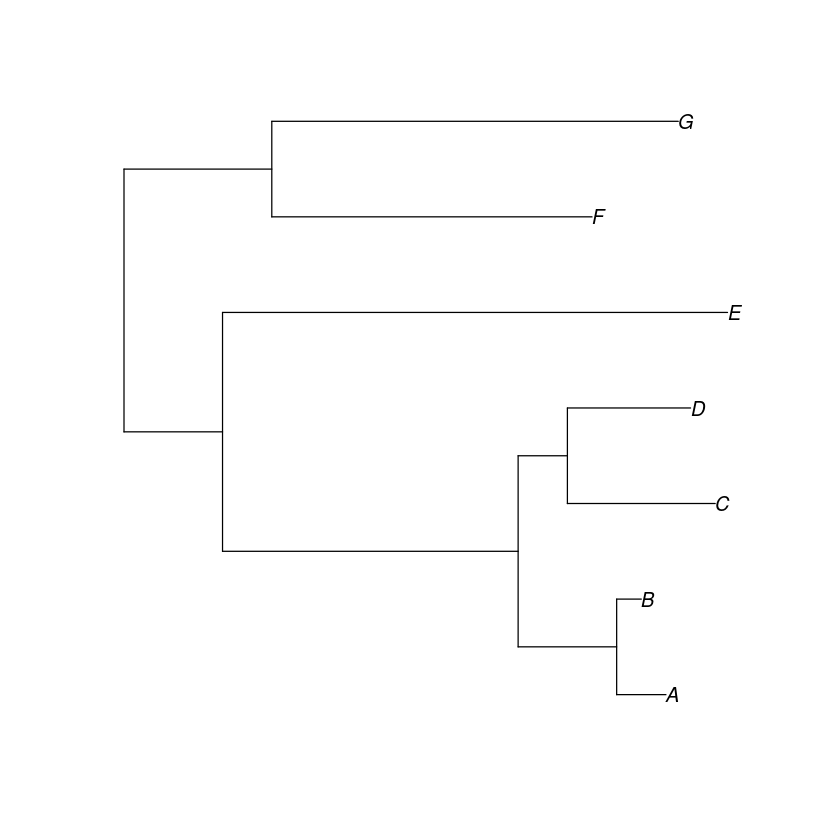

In [245]:
source("Loading.R")
newick <- "((((A:1,B:0.5):2,(C:3,D:2.5):1):6,E:10.25):2,(F:6.5,G:8.25):3):1;"
tree <- read.tree(text=newick)
plot(tree)

Because we wanted this code both to be user-friendly and to serve as an illustration of what can be written within this framework, we implemented most classic models in a generic constructor \texttt{createModel}, in the file 'ModelBank.R', that takes for arguments the tree and the name of the required model.

Available models include :
\begin{description}
\item[BM] Brownian Motion model with linear drift.\\Starts with two lineages having the same value $X_0 \sim \mathcal{N}(m_0,v_0)$.\\One trait in each lineage, all lineages evolving independently after branching following the equation.\begin{align*}dX_t^{(i)} = d dt + \sigma dW_t^{(i)}\end{align*}
\item[BM\_from0] Same as above, but starting with two lineages having the same value $X_0 \sim \mathcal{N}(0,0)$.
\item[BM\_from0\_driftless] Same as above, but with $d=0$.
\item[OU] Ornstein-Uhlenbeck model.\\Starts with two lineages having the same value $X_0 \sim \mathcal{N}(m_0,v_0)$.\\One trait in each lineage, all lineages evolving independently after branching, following the equation :\begin{align*}dX_t^{(i)} = \psi(\theta - X_t) dt + \sigma dW_t^{(i)}\end{align*}
\item[OU\_from0] Same as above, but starting with two lineages having the same value $X_0 \sim \mathcal{N}(0,0)$.
\item[EB] Early-Burst model.\\Starts with two lineages having the same value $X_0 \sim \mathcal{N}(m_0,v_0)$.\\One trait in each lineage, all lineages evolving independently after branching, following the equation :\begin{align*}dX_t^{(i)} = \sigma_0 e^{-\frac{1}{2} rt} dW_t^{(i)} \end{align*}
\item[PM] Phenotype Matching model.\\Starts with two lineages having the same value $X_0 \sim \mathcal{N}(m_0,v_0)$.\\One trait in each lineage, all lineages evolving then non-independently following the expression :\begin{align*} dX_t^{(i)} = \psi \left( \theta - X_t^{(i)} \right) + S \left( \frac{1}{n} \sum_{k=1}^n X_t^{(k)} - X_t^{(i)} \right) + \sigma dW_t^{(i)} \end{align*}
\end{description}

We can now define our first two models. The first one is a Brownian Motion model (BM), the second one is an Ornstein-Uhlenbeck model (OU). Note that both models include $m_0$ and $v_0$ as parameters.

We use the function \texttt{show} to get basic information and the function \texttt{print} to get full information, on a given model.

In [246]:
modelBM <- createModel(tree, 'BM')
modelOU <- createModel(tree, 'OU')

\subsection{Access to the content of the model}

Two functions can be used to examine the content of a model. The function \texttt{show} is intended to give the basic information, whereas \texttt{print} gives full access to the content.

In [247]:
show(modelBM)

****************************************************************
*** Object of Class PhenotypicModel *** 
*** Name of the model : [1] "BM"
*** Parameters of the model : [1] "m0"    "v0"    "d"     "sigma"
*** Description : Brownian Motion model with linear drift.
Starts with two lineages having the same value X_0 ~ Normal(m0,v0).
One trait in each lineage, all lineages evolving independently after branching.
dX_t = d dt + sigma dW_t
*** Periods : the model is cut into  13  parts. 
For more details on the model, call : print(PhenotypicModel)
****************************************************************


In [248]:
print(modelOU)

****************************************************************
*** Object of Class PhenotypicModel *** 
*** Name of the model : [1] "OU"
*** Parameters of the model : [1] "m0"    "v0"    "psi"   "theta" "sigma"
*** Description : Ornstein-Uhlenbeck model.
Starts with two lineages having the same value X_0 ~ Normal(m0,v0).
One trait in each lineage, all lineages evolving independently after branching.
dX_t = psi(theta- X_t) dt + sigma dW_t
*** Periods : the model is cut into  13  parts. 
 [1]  0.00  2.00  3.00  8.00  9.00  9.50 10.00 10.50 11.00 11.25 11.50 12.00
[13] 12.25
*** Lineages branching (to be copied at the end of the corresponding period) :
 [1] 1 1 3 1 2 5 1 2 1 7 4 3 5
*** Positions of the new trait at the end of each period :
 [1] 2 2 4 2 3 0 2 0 0 0 0 0 0
*** Initial condition :
function (params) 
{
    return(list(mean = c(params[1]), var = matrix(c(params[2]))))
}
<environment: 0x34dd2c0>
*** Vectors a_i, A_i, Gamma_i on each period i : 
function (i, params) 
{
    des

\subsection{List of class attributes}

The latter command gives us some insight into how a \texttt{PhenotypicModel} is defined. It has the following list of attributes :

\begin{description}
\item[name] a name,
\item[paramsNames] the names of all parameters,
\item[comment] a short description,
\item[period] the vector of times at which successive branching and death of lineages occur,
\item[numbersCopy] vector containing the lineage number which branches or dies at the end of each period,
\item[numbersPaste] vector containing the lineage number in which a daughter lineage is placed at the end of each period (zero if the end of the period corresponds to a death),
\item[initialCondition] a function of the parameters giving the initial mean and variance of the gaussian process at the root of the tree,
\item[aAGamma] the functions corresponding to $a_i(t)$, $A_i$, and $\Gamma_i(t)$ that define the evolution of the process on each period,
\item[constraints] a function of the parameters giving the definition range,
\item[params0] a vector of defaut parameter values.
\end{description}

Each of these attributes can be accessed and changed through the use of the following syntax :

In [249]:
modelBM['name']

[1] "BM"

In [250]:
modelBM['paramsNames']

[1] "m0"    "v0"    "d"     "sigma"

In [251]:
modelOU['paramsNames'] <- c("mean0", "var0", "selectionStrength", "equilibrium", "noise")
show(modelOU)

****************************************************************
*** Object of Class PhenotypicModel *** 
*** Name of the model : [1] "OU"
*** Parameters of the model : [1] "mean0"             "var0"              "selectionStrength"
[4] "equilibrium"       "noise"            
*** Description : Ornstein-Uhlenbeck model.
Starts with two lineages having the same value X_0 ~ Normal(m0,v0).
One trait in each lineage, all lineages evolving independently after branching.
dX_t = psi(theta- X_t) dt + sigma dW_t
*** Periods : the model is cut into  13  parts. 
For more details on the model, call : print(PhenotypicModel)
****************************************************************


However, changes must be made cautiously, in order to keep a coherent model. For example, changing 'paramsNames' for a shorter vector would not be authorized, but other deleterious actions could work and lead to issues with the methods associated to \texttt{PhenotypicModel} objects.

In [252]:
modelOU['paramsNames'] <- c("mean0", "var0")

ERROR: Error in validityMethod(as(object, superClass)): [PhenotypicModel : validation] There should be the same number of defaut parameters and parameter names.


\clearpage
\section{Methods associated to the 'PhenotypicModel' class}

\subsection{Simulating tip trait data}

The first method associated with \texttt{PhenotypicModel} objects that we will use here is \texttt{simulateTipData}. We simply give it the model and the set of parameters and it returns a realisation of the process (tip data).

In [253]:
dataBM <- simulateTipData(modelBM, c(0,0,0,1))
dataBM

*** Simulation of tip trait values ***
Simulating step-by-step the whole trajectory of a realization of the model, before returning only the tip data...


-5.750718
-5.553919
-7.522069
-3.105434
2.326861
-5.035963
-4.148336


In [254]:
dataOU <- simulateTipData(modelOU, c(0,0,1,5,1))
dataOU

*** Simulation of tip trait values ***
Simulating step-by-step the whole trajectory of a realization of the model, before returning only the tip data...


5.201917
4.947211
5.397529
5.845277
4.793885
4.880948
4.323585


A third, optional, argument, changes the behaviour of the method. The "method=1" argument first computes the tip distribution at present, before drawing a realization of this distribution, while "method=2" simulates step-by-step the whole trajectory of the process, plots the trajectories through time, and returns the tip data.

In [255]:
dataOU <- simulateTipData(modelOU, c(0,0,1,5,1), method=1)
dataOU

*** Simulation of tip trait values ***
Computing first the tip distribution, and returning a simulated dataset drawn in this distribution...


4.864876
5.152304
5.009483
4.772804
4.573878
4.822696
5.269569


In [256]:
dataOU <- simulateTipData(modelOU, c(0,0,1,5,1), method=2)
dataOU

*** Simulation of tip trait values ***
Simulating step-by-step the whole trajectory of a realization of the model and plotting the whole trajectory, before returning the tip data...


ERROR: Error in matrix(data = X, ncol = 1): objet 'X' introuvable


4.864876
5.152304
5.009483
4.772804
4.573878
4.822696
5.269569


\subsection{Getting the distribution of the model under a given set of parameters}

We can now use the implemented method \texttt{getTipDistribution} that computes the mean vector $m$ and variance matrix $\Sigma$ such that, under the model, the tip trait data $X$ follows $\mathcal{N}(m, \Sigma)$.

The second method \texttt{getDataLikelihood} returns the -ln(likelihood) of a given data set under the model, with a given set of parameters.

In [257]:
distribution <- getTipDistribution(modelBM, c(0,0,1,1))
distribution
likelihood <- getDataLikelihood(modelBM, dataBM, c(0,0,1,1))
likelihood

$mean
      [,1]
[1,] 11.00
[2,] 10.50
[3,] 12.00
[4,] 11.50
[5,] 12.25
[6,]  9.50
[7,] 11.25

$Sigma
     [,1] [,2] [,3] [,4]  [,5] [,6]  [,7]
[1,]   11 10.0    8  8.0  2.00  0.0  0.00
[2,]   10 10.5    8  8.0  2.00  0.0  0.00
[3,]    8  8.0   12  9.0  2.00  0.0  0.00
[4,]    8  8.0    9 11.5  2.00  0.0  0.00
[5,]    2  2.0    2  2.0 12.25  0.0  0.00
[6,]    0  0.0    0  0.0  0.00  9.5  3.00
[7,]    0  0.0    0  0.0  0.00  3.0 11.25

[1] 48.71287

\subsection{Maximum likelihood estimation of parameters}

We can now use the method \texttt{fitTipData} that uses the latter two methods to find the set of parameters that minimizes -ln(likelihood) for a given model, on a given data set. We will apply this method to the datasets that we simulated, in order to compare the maximum likelihood estimators with the parameters used in the simulation.

Note that this function accepts a third, optional, parameter, that is the starting vector 'params0' given to optimize the likelihood. If no value is specified, the function takes the attribute 'params0' defined in all \texttt{PhenotypicModel} objects.

In [258]:
fitBM <- fitTipData(modelBM, dataBM)
fitBM

*** Fit of tip trait data ***
Finding the maximum likelihood estimator of the parameters, before returning the likelihood and the inferred parameters...
Computation time : 0.04078507 secs 


$value
[1] 16.53945

$inferredParams
           m0            v0             d         sigma 
-9.606684e+00  8.975114e-08  5.570744e-01  1.045249e+00

In [259]:
fitOU <- fitTipData(modelOU, dataOU)
fitOU

*** Fit of tip trait data ***
Finding the maximum likelihood estimator of the parameters, before returning the likelihood and the inferred parameters...
Computation time : 0.1478863 secs 


$value
[1] 2.49128

$inferredParams
            mean0              var0 selectionStrength       equilibrium 
       6.19605591        1.32011950        0.01091409       -5.50464040 
            noise 
       0.12071254

It doesn't seem quite good, but it also seems like the choice in the starting parameters $m_0, v_0$ has a bad influence. We thus create two new models 'BM_from0' and 'OU_from0' with the subtle difference that $(m_0, v_0) = (0,0)$ and the models thus retain respectively only two and three parameters.

These two models are included in the 'ModelBank' file.

In [260]:
modelBMfromZero <- createModel(tree, 'BM_from0')
modelBMfromZero

****************************************************************
*** Object of Class PhenotypicModel *** 
*** Name of the model : [1] "BM_from0"
*** Parameters of the model : [1] "d"     "sigma"
*** Description : Brownian Motion model with linear drift.
Starts with two lineages having the same value X_0 = (0,0).
One trait in each lineage, all lineages evolving independently after branching.
dX_t = d dt + sigma dW_t
*** Periods : the model is cut into  13  parts. 
For more details on the model, call : print(PhenotypicModel)
****************************************************************

In [261]:
modelOUfromZero <- createModel(tree, 'OU_from0')
modelOUfromZero

****************************************************************
*** Object of Class PhenotypicModel *** 
*** Name of the model : [1] "OU_from0"
*** Parameters of the model : [1] "psi"   "theta" "sigma"
*** Description : Ornstein-Uhlenbeck model.
Starts with two lineages having the same value X_0 = (0,0).
One trait in each lineage, all lineages evolving independently after branching.
dX_t = psi(theta- X_t) dt + sigma dW_t
*** Periods : the model is cut into  13  parts. 
For more details on the model, call : print(PhenotypicModel)
****************************************************************

In [262]:
fitBMfromZero <- fitTipData(modelBMfromZero, dataBM)
fitOUfromZero <- fitTipData(modelOUfromZero, dataOU)
fitBMfromZero
fitOUfromZero

*** Fit of tip trait data ***
Finding the maximum likelihood estimator of the parameters, before returning the likelihood and the inferred parameters...
Computation time : 0.005785227 secs 
*** Fit of tip trait data ***
Finding the maximum likelihood estimator of the parameters, before returning the likelihood and the inferred parameters...
Computation time : 0.1486299 secs 


$value
[1] 16.82177

$inferredParams
         d      sigma 
-0.2888819  1.0626522

$value
[1] 6.163479

$inferredParams
          psi         theta         sigma 
-4.030307e-03 -1.045149e+02  2.298745e-01

We would like here to warn users about the use of the \texttt{fitTipData} method. The optimizers sometimes seems to be attracted to a wrong region in the parameter space. Starting the optimization with different parameter sets might be the best practice to comfort the results.

For example, here, starting with another initial parameter set doesn't lead to the best likelihood optimization.

In [263]:
getDataLikelihood(modelOUfromZero, dataOU, c(1,5,1))

[1] 4.371685

In [264]:
fitOUfromZero <- fitTipData(modelOUfromZero, dataOU, c(1,5,1))
fitOUfromZero

*** Fit of tip trait data ***
Finding the maximum likelihood estimator of the parameters, before returning the likelihood and the inferred parameters...
Computation time : 0.07726359 secs 


$value
[1] -0.6740672

$inferredParams
     psi    theta    sigma 
7.951395 4.923612 0.876305

\clearpage
\section{Toward a more in-depth understanding of the code}

\subsection{Relationships between the different classes of models}

This section can be skipped if you are not interested in using this framework to build your own model. Otherwise, it is worth understanding how the different models relate to each others.

The mother and most general class, for which all the above-mentionned functions are defined, is the \texttt{PhenotypicModel} class. When a model is "only" known as a \texttt{PhenotypicModel}, the method that computes the tip distribution, namely \texttt{getTipDistribution} is the most general one. It thus computes the distribution by resolving numerically an ODE system, which takes a lot of time.

However, faster algorithms exist to compute the tip distribution for some particular types of models (see recap table in the main text). This is the reason why we chose to define four daughter-classes :
\begin{description}
\item[PhenotypicBM] For Brownian models.
\item[PhenotypicOU] For Ornstein-Uhlenbeck models.
\item[PhenotypicEB] For Early-Burst models.
\item[PhenotypicADiag] Models for which, $\forall i, A_i$ is symmetric and $\Gamma_i = \sigma I$.
\end{description}

For each of these daughter-classes, a new, more appropriated, function \texttt{getTipDistribution} has been written. \texttt{PhenotypicModels} which are also \texttt{PhenotypicOU}, will preferentially use methods defined for \texttt{PhenotypicOU} when they exist.

\subsection{Application : three different ways to define an OU}

In the \texttt{createModel} function, the keyword 'OU' constructs a model in the class \texttt{PhenotypicOU}. In this class, the function \texttt{getTipDistribution} uses the analytical formula to speed up the computation of $m$ and $\Sigma$.

Alternatively, the keyword 'OUbis' defines the exact same model, but as an instance of the class \texttt{PhenotypicADiag}. Thus, the function \texttt{getTipDistribution} uses the semi-integrated formula to compute $m$ and $\Sigma$.

Last, the keyword 'OUter' still defines the exact same model, but as an instance of the class \texttt{PhenotypicModel}. Thus, the function \texttt{getTipDistribution} uses the resolution of the ODE system to compute $m$ and $\Sigma$.

We will see here that the function returns the same value with the three different methods, and that the use of the analytical formula speeds up drastically the computation time.

In [265]:
modelOU <- createModel(tree, 'OU')
modelOU
modelOUbis <- createModel(tree, 'OUbis')
modelOUbis
modelOUter <- createModel(tree, 'OUter')
modelOUter

****************************************************************
*** Object of Class PhenotypicModel *** 
*** Name of the model : [1] "OU"
*** Parameters of the model : [1] "m0"    "v0"    "psi"   "theta" "sigma"
*** Description : Ornstein-Uhlenbeck model.
Starts with two lineages having the same value X_0 ~ Normal(m0,v0).
One trait in each lineage, all lineages evolving independently after branching.
dX_t = psi(theta- X_t) dt + sigma dW_t
*** Periods : the model is cut into  13  parts. 
For more details on the model, call : print(PhenotypicModel)
****************************************************************

****************************************************************
*** Object of Class PhenotypicModel *** 
*** Name of the model : [1] "OUbis"
*** Parameters of the model : [1] "m0"    "v0"    "psi"   "theta" "sigma"
*** Description : Ornstein-Uhlenbeck model.
Starts with two lineages having the same value X_0 ~ Normal(m0,v0).
One trait in each lineage, all lineages evolving independently after branching.
dX_t = psi(theta- X_t) dt + sigma dW_t
*** Periods : the model is cut into  13  parts. 
For more details on the model, call : print(PhenotypicModel)
****************************************************************

****************************************************************
*** Object of Class PhenotypicModel *** 
*** Name of the model : [1] "OUter"
*** Parameters of the model : [1] "m0"    "v0"    "psi"   "theta" "sigma"
*** Description : Ornstein-Uhlenbeck model.
Starts with two lineages having the same value X_0 ~ Normal(m0,v0).
One trait in each lineage, all lineages evolving independently after branching.
dX_t = psi(theta- X_t) dt + sigma dW_t
*** Periods : the model is cut into  13  parts. 
For more details on the model, call : print(PhenotypicModel)
****************************************************************

In [266]:
params <- c(0,0,0.2,1,2)
getTipDistribution(modelOU, params, TRUE)
getTipDistribution(modelOUbis, params, TRUE)
getTipDistribution(modelOUter, params, TRUE)

*** Computation of tip traits distribution through the analytical formula for an Ornstein-Uhlenbeck process ***
Computation time : 0.0003082752 secs 


$mean
          [,1]
[1,] 0.8891968
[2,] 0.8775436
[3,] 0.9092820
[4,] 0.8997412
[5,] 0.9137064
[6,] 0.8504314
[7,] 0.8946008

$Sigma
          [,1]      [,2]       [,3]      [,4]       [,5]      [,6]      [,7]
[1,] 9.8772266 7.2724966 2.36545128 2.6142280 0.11718135 0.0000000 0.0000000
[2,] 7.2724966 9.8500442 2.61422796 2.8891687 0.12950541 0.0000000 0.0000000
[3,] 2.3654513 2.6142280 9.91770253 3.2377581 0.09593997 0.0000000 0.0000000
[4,] 2.6142280 2.8891687 3.23775807 9.8994816 0.10603007 0.0000000 0.0000000
[5,] 0.1171813 0.1295054 0.09593997 0.1060301 9.92553417 0.0000000 0.0000000
[6,] 0.0000000 0.0000000 0.00000000 0.0000000 0.00000000 9.7762923 0.3657529
[7,] 0.0000000 0.0000000 0.00000000 0.0000000 0.00000000 0.3657529 9.8889100

*** Computation of tip traits distribution through integrated formula ***
(Method working for models with a constant, A diagonalizable, and Gamma constant)
Computation time : 0.004669666 secs 


$mean
          [,1]
[1,] 0.8891968
[2,] 0.8775436
[3,] 0.9092820
[4,] 0.8997412
[5,] 0.9137064
[6,] 0.8504314
[7,] 0.8946008

$Sigma
          [,1]      [,2]       [,3]      [,4]       [,5]      [,6]      [,7]
[1,] 9.8772266 7.2724966 2.36545128 2.6142280 0.11718135 0.0000000 0.0000000
[2,] 7.2724966 9.8500442 2.61422796 2.8891687 0.12950541 0.0000000 0.0000000
[3,] 2.3654513 2.6142280 9.91770253 3.2377581 0.09593997 0.0000000 0.0000000
[4,] 2.6142280 2.8891687 3.23775807 9.8994816 0.10603007 0.0000000 0.0000000
[5,] 0.1171813 0.1295054 0.09593997 0.1060301 9.92553417 0.0000000 0.0000000
[6,] 0.0000000 0.0000000 0.00000000 0.0000000 0.00000000 9.7762923 0.3657529
[7,] 0.0000000 0.0000000 0.00000000 0.0000000 0.00000000 0.3657529 9.8889100

*** Computation of tip traits distribution through ODE resolution ***
(Method working for any model)
Computation time : 0.2495759 secs 


$mean
          [,1]
[1,] 0.8891984
[2,] 0.8775447
[3,] 0.9092837
[4,] 0.8997429
[5,] 0.9137081
[6,] 0.8504309
[7,] 0.8946024

$Sigma
          [,1]      [,2]       [,3]      [,4]       [,5]      [,6]      [,7]
[1,] 9.8772243 7.2725143 2.36548343 2.6142593 0.11718371 0.0000000 0.0000000
[2,] 7.2725143 9.8500418 2.61425810 2.8891973 0.12950776 0.0000000 0.0000000
[3,] 2.3654834 2.6142581 9.91769978 3.2378080 0.09594306 0.0000000 0.0000000
[4,] 2.6142593 2.8891973 3.23780799 9.8994793 0.10603262 0.0000000 0.0000000
[5,] 0.1171837 0.1295078 0.09594306 0.1060326 9.92553239 0.0000000 0.0000000
[6,] 0.0000000 0.0000000 0.00000000 0.0000000 0.00000000 9.7762896 0.3657561
[7,] 0.0000000 0.0000000 0.00000000 0.0000000 0.00000000 0.3657561 9.8889077

In [267]:
data <- simulateTipData(modelOU, c(0,0,0.2,1,2))
data

*** Simulation of tip trait values ***
Simulating step-by-step the whole trajectory of a realization of the model, before returning only the tip data...


4.846639
1.594712
-0.06951463
3.342713
5.729854
-1.402092
2.915526


In [268]:
fitTipData(modelOU, data)
fitTipData(modelOUbis, data)
fitTipData(modelOUter, data)

*** Fit of tip trait data ***
Finding the maximum likelihood estimator of the parameters, before returning the likelihood and the inferred parameters...
Computation time : 0.1412208 secs 


$value
[1] 15.98349

$inferredParams
        m0         v0        psi      theta      sigma 
-14.696322  27.638120   4.002437   2.410494   6.714301

*** Fit of tip trait data ***
Finding the maximum likelihood estimator of the parameters, before returning the likelihood and the inferred parameters...
Computation time : 3.300177 secs 


$value
[1] 15.98349

$inferredParams
        m0         v0        psi      theta      sigma 
-14.696322  27.638120   4.002437   2.410494   6.714301

*** Fit of tip trait data ***
Finding the maximum likelihood estimator of the parameters, before returning the likelihood and the inferred parameters...
Computation time : 2.388585 mins 


$value
[1] 15.98349

$inferredParams
        m0         v0        psi      theta      sigma 
-14.696322  27.638120   4.002437   2.410494   6.714301

Focusing on the computation time, it is quite easily seen how interesting it can be to do some more analytical work and write more appropriated \texttt{getTipDistribution} functions. Still, the defaut function written for the mother class \texttt{PhenotypicModel} should always work.